# Fighter Calibration Model

## Configure your Fighters here: 

In [77]:
# Define Fighter 1
fighter1_name = "Fighter #1"
fighter1_attack_range = [1,60]
fighter1_defense_range = [1,20]
fighter1_stamina_range = [1,45]
fighter1_speed_range = [1,25]

# Define Fighter 2
fighter2_name = "Fighter #2"
fighter2_attack_range = [1,20]
fighter2_defense_range = [1,60]
fighter2_stamina_range = [1,25]
fighter2_speed_range = [1,45]

number_of_fights = 1000

## Execute Fight(s)

In [78]:
from Objects.Fighter import Fighter
from Objects.Fight import Fight

In [79]:
for number in range(number_of_fights):
    f1 = Fighter(fighter1_name, fighter1_attack_range, fighter1_defense_range, fighter1_stamina_range, fighter1_speed_range)
    f2 = Fighter(fighter2_name, fighter2_attack_range, fighter2_defense_range, fighter2_stamina_range, fighter2_speed_range)
    
    f = Fight(number+1, f1, f2)

## Process Data

### Pick up and display sample of statistics file

In [80]:
import pandas as pd

df = pd.read_csv('statistics.csv')
df.head(5)

,fight_number,fight_round,fighter1_name,fighter1_strategy,fighter1_strategy_level,fighter1_characteristic_level,fighter1_health_in,fighter1_health_out,fighter1_score,fighter1_win,fighter2_name,fighter2_strategy,fighter2_strategy_level,fighter2_characteristic_level,fighter2_health_in,fighter2_health_out,fighter2_score,fighter2_win
0,1,1,Fighter #1,attack,51,15,50,50,29.3250,True,Fighter #2,defense,46,6,50,45,24.380,False
1,1,2,Fighter #1,attack,1,23,50,22,0.6150,False,Fighter #2,defense,51,12,45,45,28.560,True
2,1,3,Fighter #1,attack,33,17,22,22,28.9575,True,Fighter #2,attack,6,19,45,21,5.355,False
3,1,4,Fighter #1,defense,16,7,22,18,8.5600,False,Fighter #2,attack,19,32,21,21,12.540,True
4,1,5,Fighter #1,attack,7,4,18,3,3.6400,False,Fighter #2,defense,33,15,21,21,18.975,True


### Summarize data and group

In [81]:
df_fightround = df[['fight_number','fight_round']]
df_grouped = df_fightround.groupby('fight_number')
df_max = df_grouped.max().reset_index()

## Generate Chart

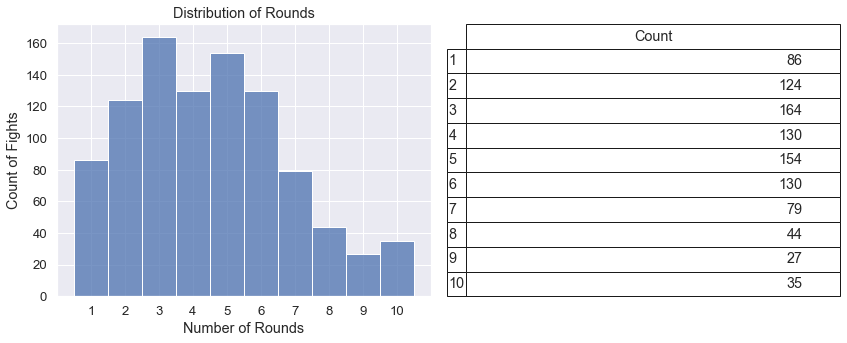

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))

# define ax1 (plot)

sns.set(style="darkgrid", font_scale=1.2)

chart = sns.histplot(
                    data=df_max,
                    x="fight_round",
                    ax=ax1, 
                    discrete=True
                    )

chart.set(
            xticks=[1,2,3,4,5,6,7,8,9,10],
            xlabel="Number of Rounds",
            ylabel="Count of Fights",
            title="Distribution of Rounds",
            xlim=(0,11)
        )

# define ax2 (table)

plt.rcParams["figure.autolayout"] = True
v = pd.DataFrame(df_max['fight_round'].value_counts()).sort_index()
bbox = [0, 0, 1, 1]
ax2.axis('off')
table = ax2.table(cellText=v.values, rowLabels=v.index, bbox=bbox, colLabels=["Count"])

plt.show()

## Move Statistics to Archive

In [83]:
import os

counter = 0

# find the latest file number in archives, increase by 1
# if no file is found yet, start counter at 1
filelist = os.listdir("./Archives")
if  filelist == []:
    counter = 1
else:
    filelist.sort()
    counter = int(os.path.basename(filelist[-1])[0]) + 1

# save chart and table as PDF
f.savefig("archives/%i.pdf" % counter)

# move statistics file to archive
os.rename("statistics.csv", "archives/%i.csv" % counter)